In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [18]:
import zipfile

# Path to the zip file
zip_file_path = 'D://Covid19.zip'

# Directory to extract the contents
extract_dir = 'D://Covid19-dataset'

# Check if the extraction directory exists, if not, create it
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset extracted successfully.")


Dataset extracted successfully.


In [19]:
# Define paths to train and test directories
train_dir = os.path.join(extract_dir, 'train')
test_dir = os.path.join(extract_dir, 'test')

# Image dimensions
img_width, img_height = 150, 150


In [21]:
# Step 3: Define Directories and Image Dimensions
# Define paths to train and test directories
train_dir = 'D:/Covid19-dataset/train'
test_dir = 'D:/Covid19-dataset/test'

# Image dimensions
img_width, img_height = 150, 150

# Check if the directories exist
if not os.path.exists(train_dir):
    print(f"Error: Train directory '{train_dir}' does not exist.")
if not os.path.exists(test_dir):
    print(f"Error: Test directory '{test_dir}' does not exist.")


Error: Train directory 'D:/Covid19-dataset/train' does not exist.
Error: Test directory 'D:/Covid19-dataset/test' does not exist.


In [26]:
# Step 3: Define Directories and Image Dimensions
# Define paths to train and test directories
train_dir = "D:\\Covid19-dataset\\Covid19-dataset\\train"
test_dir = "D:\\Covid19-dataset\\Covid19-dataset\\test"

# Image dimensions
img_width, img_height = 150, 150

# Check if the directories exist
if not os.path.exists(train_dir):
    print(f"Error: Train directory '{train_dir}' does not exist.")
if not os.path.exists(test_dir):
    print(f"Error: Test directory '{test_dir}' does not exist.")


In [27]:
# Data Preprocessing and Augmentation
if os.path.exists(train_dir) and os.path.exists(test_dir):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )
else:
    print("Error: Unable to create ImageDataGenerator as train or test directory is missing.")


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [28]:
# Model Building
if 'train_generator' in locals() and 'test_generator' in locals():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dense(3, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()
else:
    print("Error: Unable to build the model as train or test generator is missing.")


C:\Users\SIDDHESH\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Model Training
if 'model' in locals() and 'train_generator' in locals() and 'test_generator' in locals():
    epochs = 10
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs,
        validation_data=test_generator,
        validation_steps=test_generator.samples // batch_size
    )
else:
    print("Error: Unable to train the model as model or train or test generator is missing.")


Epoch 1/10


C:\Users\SIDDHESH\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 537ms/step - accuracy: 0.3900 - loss: 1.9685 - val_accuracy: 0.6406 - val_loss: 1.0625
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 1.1025 - val_accuracy: 0.0000e+00 - val_loss: 1.1877
Epoch 3/10


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 411ms/step - accuracy: 0.4671 - loss: 1.0246 - val_accuracy: 0.6875 - val_loss: 0.7528
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5312 - loss: 0.8969 - val_accuracy: 1.0000 - val_loss: 0.8774
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 352ms/step - accuracy: 0.6573 - loss: 0.7584 - val_accuracy: 0.9062 - val_loss: 0.3505
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7188 - loss: 0.5676 - val_accuracy: 1.0000 - val_loss: 0.2700
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 384ms/step - accuracy: 0.7696 - loss: 0.5570 - val_accuracy: 0.8906 - val_loss: 0.3178
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8438 - loss: 0.3092 - val_accuracy: 1.0000 - val_loss: 0.1260
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 0.8777 - loss: 0.3362 - val_accuracy: 0.7500 - val_loss: 0.5101
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8438 - loss: 0.4181 - val_accuracy: 1.0000 - val_loss: 0.2800


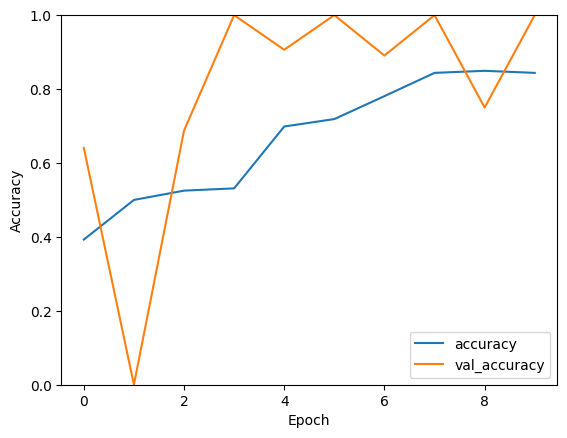

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.8080 - loss: 0.3777
Test Accuracy: 0.7878788113594055


In [30]:
# Model Evaluation
if 'history' in locals():
    # Plot training history
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(test_generator)
    print(f'Test Accuracy: {accuracy}')
else:
    print("Error: Unable to evaluate the model as training history is missing.")


In [31]:
# Save the Model
if 'model' in locals():
    model.save('covid_detection_model.h5')
    print("Model saved successfully as 'covid_detection_model.h5'.")
else:
    print("Error: Unable to save the model as model is missing.")


Model saved successfully as 'covid_detection_model.h5'.


In [32]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('covid_detection_model.h5')

# Define the image dimensions expected by the model
img_width, img_height = 150, 150

# Define the class labels
class_labels = {0: 'Covid-19', 1: 'Normal', 2: 'Viral Pneumonia'}

def predict_image():
    # Open file dialog to select an image
    file_path = filedialog.askopenfilename()
    
    if file_path:
        # Load and preprocess the image
        img = Image.open(file_path)
        img = img.resize((img_width, img_height))
        img = np.array(img) / 255.0
        img = np.expand_dims(img, axis=0)
        
        # Predict the class label
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)
        predicted_label = class_labels[predicted_class]
        
        # Display the image and prediction
        img_label.config(text=f'Predicted Class: {predicted_label}')
        img_display.image = ImageTk.PhotoImage(Image.open(file_path).resize((250, 250)))
        img_display.config(image=img_display.image)

# Create the Tkinter GUI
root = tk.Tk()
root.title('Covid-19 Detection')

# Create widgets
btn_browse = tk.Button(root, text='Browse Image', command=predict_image)
img_display = tk.Label(root)

# Layout widgets
btn_browse.pack(pady=10)
img_display.pack()

# Start the GUI event loop
root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python312\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\SIDDHESH\AppData\Local\Temp\ipykernel_3556\4213116031.py", line 30, in predict_image
    prediction = model.predict(img)
                 ^^^^^^^^^^^^^^^^^^
  File "C:\Users\SIDDHESH\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\SIDDHESH\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\input_spec.py", line 227, in assert_input_compatibility
    raise ValueError(
ValueError: Exception encountered when calling Sequential.call().

Input 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (1, 150, 150, 4)

Arguments received by Sequential.call():
  •

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python312\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\SIDDHESH\AppData\Local\Temp\ipykernel_3556\4213116031.py", line 35, in predict_image
    img_label.config(text=f'Predicted Class: {predicted_label}')
    ^^^^^^^^^
NameError: name 'img_label' is not defined


KeyboardInterrupt: 

In [33]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('covid_detection_model.h5')

# Define the image dimensions expected by the model
img_width, img_height = 150, 150

# Define the class labels
class_labels = {0: 'Covid-19', 1: 'Normal', 2: 'Viral Pneumonia'}

def predict_image():
    # Open file dialog to select an image
    file_path = filedialog.askopenfilename()
    
    if file_path:
        # Load and preprocess the image
        img = Image.open(file_path)
        img = img.resize((img_width, img_height))
        
        # Convert the image to RGB mode (3 channels)
        img = img.convert('RGB')
        
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        
        # Predict the class label
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)
        predicted_label = class_labels[predicted_class]
        
        # Display the prediction
        messagebox.showinfo("Prediction", f"Predicted Class: {predicted_label}")

# Create the Tkinter GUI
root = tk.Tk()
root.title('Covid-19 Detection')

# Create widgets
btn_browse = tk.Button(root, text='Browse Image', command=predict_image)

# Layout widgets
btn_browse.pack(pady=10)

# Start the GUI event loop
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python312\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\SIDDHESH\AppData\Local\Temp\ipykernel_3556\4213116031.py", line 35, in predict_image
    img_label.config(text=f'Predicted Class: {predicted_label}')
    ^^^^^^^^^
NameError: name 'img_label' is not defined


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


KeyboardInterrupt: 